<a href="https://colab.research.google.com/github/dnjhaha/AML/blob/master/AMLASSIGN4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Danni Jin AML Spring 2020 assignment #4
**Set up First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:**

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
# Common imports
import numpy as np
import os
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

**The first thing we'll need to do is load in the libraries we'll be using.**

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

**We have to read in the CSV file that is from the github. We'll use a package called pandas for that. Take a first look at the data.**


In [3]:
url = 'https://raw.githubusercontent.com/dnjhaha/AML/master/PRSA_data_2010.1.1-2014.12.31.csv'
BeiPM = pd.read_csv(url)
BeiPM.head(10)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


**The first thing I do when I get a new dataset is take a look at some of it. This lets me see that it all read in correctly and get an idea of what's going on with the data.**

In [148]:
BeiPM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


**see the data type, how many columns, and does the column has the NaN value.**

# Statistical summary

In [13]:
BeiPM.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


#Perform data scrubbing (handle missing data, normalization, scaling, etc.)
**Data clean:Machine Learning algorithm cannot deal with missing feature.**

In [4]:
#Missing data
total = BeiPM.isnull().sum().sort_values(ascending=False)# get the number of missing data points per column
missing_data = pd.concat([total], axis=1, keys=['Total'])
missing_data.head(25)

,Total
pm2.5,2067
Ir,0
Is,0
Iws,0
cbwd,0
PRES,0
TEMP,0
DEWP,0
hour,0
day,0


**See how many missing data points we have. In this case, I'm looking to see if I see any missing values, which will be reprsented how many NaN in the column.**

**put median value into the position which has many NaN values**

In [0]:
#BeijingPM=BeiPM.dropna(subset=["pm2.5"])
median = BeiPM["pm2.5"].median()#calculate the column: pm2.5 median.
BeiPM["pm2.5"].fillna(median, inplace=True)


In [6]:
#Missing data
total = BeiPM.isnull().sum().sort_values(ascending=False)# get the number of missing data points per column
missing_data = pd.concat([total], axis=1, keys=['Total'])
missing_data.head(25)

,Total
Ir,0
Is,0
Iws,0
cbwd,0
PRES,0
TEMP,0
DEWP,0
pm2.5,0
hour,0
day,0


In [0]:
BeiPM_cat=BeiPM[['cbwd']]

**Handling Text and Categorical attributes: column cbwd is a text attribute, most machine learning algorithm prefer to work with numbers. so convert these text labels to numbers.
Scikit-Learn provides a transformer for this called OrdinalEncoder:** 

In [0]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20
    

In [9]:
ordinal_encoder = OrdinalEncoder()
Bei_encoded = ordinal_encoder.fit_transform(BeiPM_cat)
Bei_encoded[:20]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [3.],
       [1.],
       [1.],
       [0.],
       [1.]])

**after i change the column: BeiPM_cat data type to number, using assign method to replace the column to the new one.**

In [0]:
BeiPM = BeiPM.assign(cbwd= Bei_encoded)

In [11]:
BeiPM.head(20)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,72.0,-21,-11.0,1021.0,1.0,1.79,0,0
1,2,2010,1,1,1,72.0,-21,-12.0,1020.0,1.0,4.92,0,0
2,3,2010,1,1,2,72.0,-21,-11.0,1019.0,1.0,6.71,0,0
3,4,2010,1,1,3,72.0,-21,-14.0,1019.0,1.0,9.84,0,0
4,5,2010,1,1,4,72.0,-20,-12.0,1018.0,1.0,12.97,0,0
5,6,2010,1,1,5,72.0,-19,-10.0,1017.0,1.0,16.10,0,0
6,7,2010,1,1,6,72.0,-19,-9.0,1017.0,1.0,19.23,0,0
7,8,2010,1,1,7,72.0,-19,-9.0,1017.0,1.0,21.02,0,0
8,9,2010,1,1,8,72.0,-19,-9.0,1017.0,1.0,24.15,0,0
9,10,2010,1,1,9,72.0,-20,-8.0,1017.0,1.0,27.28,0,0


**Linear Relationship Ratios：Show what data that has a linear or some kind of relationship to the pm2.5.**

In [12]:
corr_matrix = BeiPM.corr()
corr_matrix["pm2.5"].sort_values(ascending=False)

pm2.5    1.000000
cbwd     0.192094
DEWP     0.165696
day      0.079172
Is       0.020192
year    -0.005805
No      -0.009091
hour    -0.022435
month   -0.024286
PRES    -0.046337
Ir      -0.050135
TEMP    -0.089115
Iws     -0.239623
Name: pm2.5, dtype: float64

**Here we can see that the column cbwd, DEWP, Iws are more relative with the pm2.5.**

**Create a heat map**

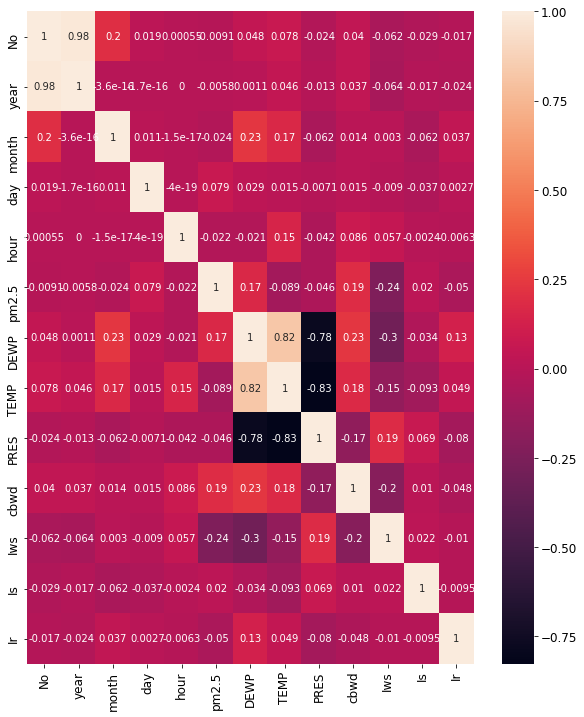

In [23]:
plt.figure(figsize=(10, 12))
sns.heatmap(corr_matrix, annot=True)

**Scatterplot Matrix**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


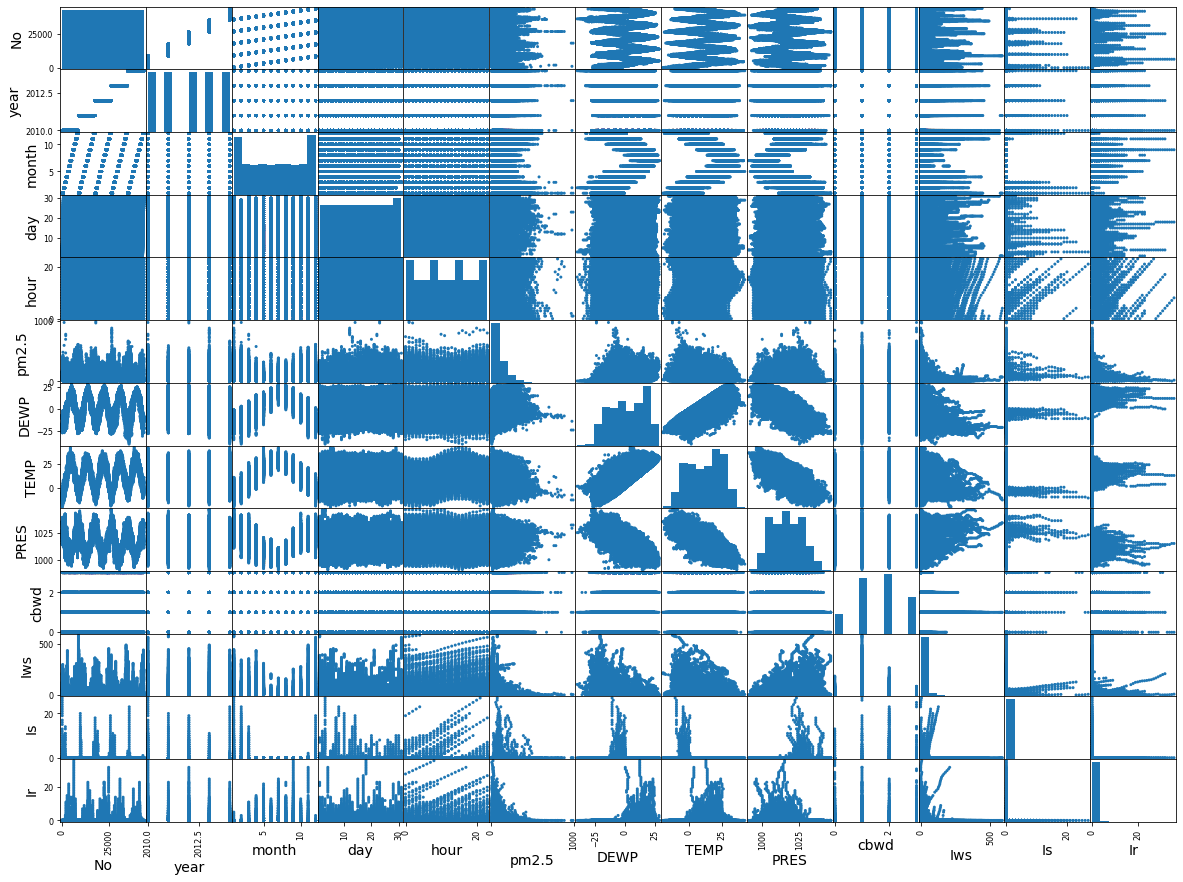

In [24]:
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(figsize=(20,15))
scatter_matrix(BeiPM,alpha=1, ax=ax)
plt.show()

**We will use the code from scikit-learn called ‘train_test_split’, split our dataset into a training set and a test set.
test_size=0.2:This tells scikit-learn that your val_and_test size will be 20% of the overall dataset. The code will store the split data into the first four variables on the left of the equal sign.**

In [13]:
y = BeiPM['pm2.5']
X = BeiPM.drop(columns=['pm2.5','No','year','month','day'])
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print(X_train.shape, y_train.shape)


(35059, 8) (35059,)


**when using Gradient Descent,you should ensure that all features have a similar scale(e.g., using Scikit-Learn's StandardScaler class), or else it will take much longer to converge.**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc= scaler.fit_transform(X_train)
X_test_sc= scaler.fit_transform(X_test)

**Normal linear regression.**
**model parameter**

In [27]:
linear_model.LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

**Directly use Scikit-Learn to train the model**

In [28]:
linear=linear_model.LinearRegression()
linear.fit(X_train_sc,y_train)
linear.score(X_train_sc,y_train)

0.25009169294467504

In [29]:
linear.score(X_test_sc,y_test)#Return the coefficient of determination R^2 of the prediction. R^2 of self.predict(X) wrt. y.

0.2468219197465342

**The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).**

**that is each parametre of the equation,y=a*X0+b*X1+...+hX8+i. coef_ is a,b,...,h. interrcept_ is i**

In [30]:
linear.coef_,linear.intercept_


(array([  9.92534762,  61.00998724, -76.39775039, -16.25998968,
         10.59401246, -11.00284822,  -2.14148917,  -9.24990432]),
 97.31287258621177)

**After data normalization, re-do the linear regression to see the difference.**

In [293]:
linear=linear_model.LinearRegression(normalize=True)
model=linear.fit(X_train_sc,y_train)
linear.score(X_train_sc,y_train)

0.25009169294467515

In [294]:
linear.score(X_test_sc,y_test)

0.2468219197465343

**result: Here we can see that is almost no difference.**

**Calculate the MSE:**

In [295]:
y_hat=linear.predict(X_train_sc)
y_pre=linear.predict(X_test_sc)
mse=(y_hat-y_train).T.dot(y_hat-y_train)/len(y_train)
mse

6103.456356048995

**The most common performance measure of a regression model is the root mean square error(RMSE).Therefore, to train a linear regression model, i need to find the value of theta that minimizes the RMSE. But here it's simpler to minimize the mean square error (MSE) than the RMSE, and it leads to the same result(because the value that minimizes a function also minimizes its square root).**

**Let's plot this model's predictions**

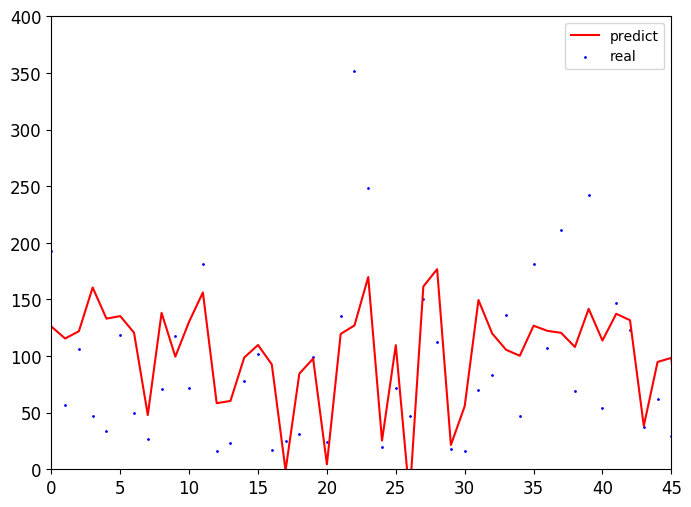

In [296]:
plt.rcParams['savefig.dpi']=300 #pixel
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['figure.figsize']=(8.0,6.0)
plt.figure()
plt.scatter(list(range(len(y_pre))),y_test,label='real',color='b',s=1)
plt.plot(list(range(len(y_pre))),y_pre,label='predict',color='r')
plt.axis([0, 45, 0, 400])
plt.legend()
plt.show()

**Result: the picture of plain linear regression is performing bad and not linear at all.**

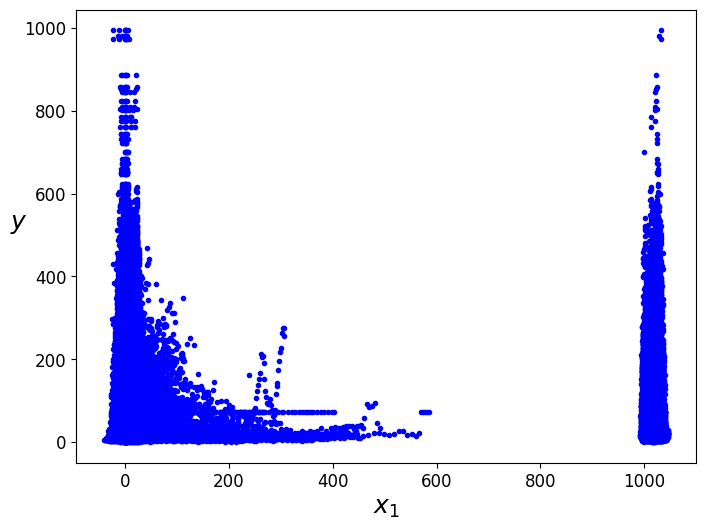

In [297]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
#plt.axis([0, 2, 0, 15])
#save_fig("generated_data_plot")
plt.show()

In [0]:
X_b = np.hstack([np.ones((len(X_train), 1)), X_train])

# Evaluate the performance of  each model using k-fold cross validation

**We can then evaluate the model with normalization of the input and output variables using 10-fold cross-validation.**

In [298]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(linear, X_train_sc, y_train, scoring='neg_mean_squared_error', cv=cv)
scores

array([-5758.84071611, -6042.29800795, -6192.3673786 , -6678.39114549,
       -6359.28294579, -6218.15223169, -6074.69925618, -6031.76762939,
       -5930.84392118, -5775.55973438])

**MSE should be positive.But why is the MSE here negative?MSE is a loss function. It is something we want to minimize.A design decision was made so that the results are made negative. The best results would be the largest number (the least negative) so we can still maximize similar to classification accuracy.**

In [299]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[5758.84071611 6042.29800795 6192.3673786  6678.39114549 6359.28294579
 6218.15223169 6074.69925618 6031.76762939 5930.84392118 5775.55973438]


In [300]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
# calculate the average RMSE
print(rmse_scores.mean())

[75.88702601 77.73221988 78.69159662 81.72142403 79.74511236 78.85526128
 77.94035704 77.66445538 77.01197258 75.99710346]
78.12465286510078


**non-linear regression:Polynomial regression**

**Above picture shows that a straight picture will never fit this data properly. So use non_linear regression: polynomial regression to transform our trainning data, adding the square (2 degree polynomial) of each feature in the training set as new features.**

In [0]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X_train_sc)

**X_poly now contains the original feature of X_train_sc plus the square of this feature. Now using linear regression model to this extended training data**.

In [17]:
regressor_poly2 = LinearRegression(normalize=True)
pol_model=regressor_poly2.fit(X_poly, y_train)
regressor_poly2.intercept_, regressor_poly2.coef_

(17834439982.254597,
 array([ 1.00894043e+01,  7.78089905e+01, -8.94951121e+01, -1.29455118e+01,
         1.50618173e+01, -1.35480531e+01,  2.58773050e+11,  1.29204467e+11,
        -5.15842139e+00,  3.23545098e+00, -1.03763519e+01, -4.63303094e+00,
         8.74974630e-01, -3.50264940e+00,  7.73686010e-01, -1.74010408e+00,
         2.21175724e+01, -6.54782842e+01, -3.08573254e+00,  1.49657402e+00,
        -1.24677224e+01,  9.78554140e+00, -4.66674318e-01,  3.99236757e+01,
         7.07866105e+00,  1.94667453e+00,  1.82782240e+01, -2.39370919e+00,
         6.83622528e+00, -5.39715331e+00,  1.73536434e+00,  7.70809390e+00,
         9.58199821e-01,  1.59136190e+00, -1.99644492e+00,  1.67753985e+01,
        -6.93252023e-01, -3.55009126e-01,  2.39660618e+00,  1.19551160e+00,
         2.87459436e+00,  1.65538740e-01,  1.87472296e+12,  6.65644827e-01]))

In [19]:
regressor_poly2.score(X_poly,y_train)

0.3132496757565588

**Plot polynomial model:**

No handles with labels found to put in legend.


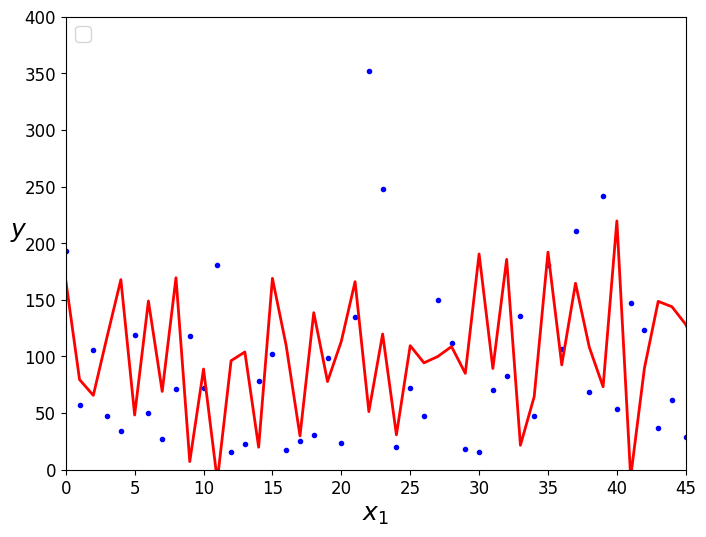

In [303]:
y_pre=pol_model.predict(X_poly)
plt.plot(list(range(len(y_test))), y_test, "b.")
plt.plot( list(range(len(y_pre))),y_pre, "r-", linewidth=2)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 45, 0, 400])
plt.show()

**Using the k-fold cross validation evaluates the performance of Polynomial regression model.**  

In [304]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(pol_model, X_poly, y_train, scoring='neg_mean_squared_error', cv=cv)
scores

array([-5208.11262057, -5507.66332045, -5722.61689315, -6184.9636141 ,
       -5759.57390708, -5638.39144951, -5638.77854211, -5585.51216722,
       -5444.84975549, -5321.93611938])

In [305]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[5208.11262057 5507.66332045 5722.61689315 6184.9636141  5759.57390708
 5638.39144951 5638.77854211 5585.51216722 5444.84975549 5321.93611938]


In [306]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
# calculate the average RMSE
print(rmse_scores.mean())

[72.16725449 74.21363298 75.6479801  78.64453963 75.89185666 75.08922326
 75.09180076 74.73628414 73.7892252  72.95160121]
74.82233984384128


**result: the RMSE mean value is 74.82, that is smaller than the linear regression model.**

#Plot and compare learning curves for all models


**define a function that plots the learning curves of a model, training data and the validation data.**

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_sgd_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m].ravel())
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14) 

**Plot the learning curves of the plain linear regression model**

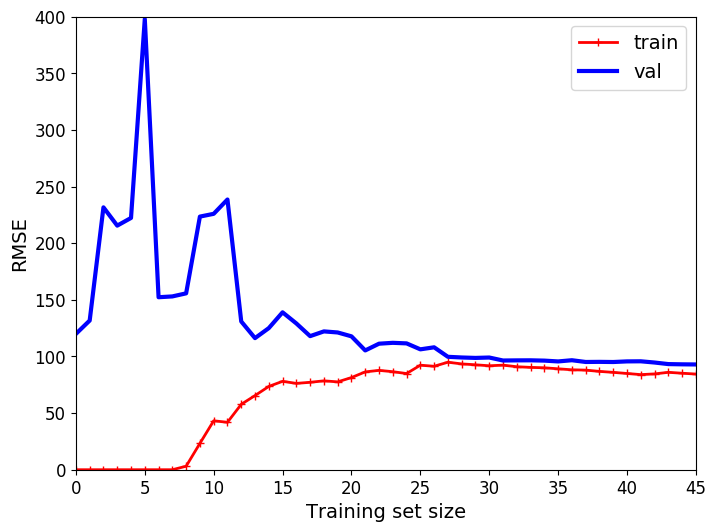

In [308]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 45, 0, 400])                            
plt.show()   

**Let's look at the performance on the training data: we know that just one or two instances in the trainning set,the model can fit them perfectly, which is why the curve starts at near zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. so the error is on the training set goes up until it reaches a plateau, at which point adding new instances to the training set doesn't make the average error much better or worse.**

**Now let's look at the performance of the model on the validation data.when the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big.then as the model is shown more training examples, it learns and thus the validation error slowly goes down.** 
**However, a staight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to other curve.**

**the learning curve are typecal of an underfitting model, both curve have reached a plateau. they are close and fairly high.**

**Plot the learning curves of the plain polynomial regression model**

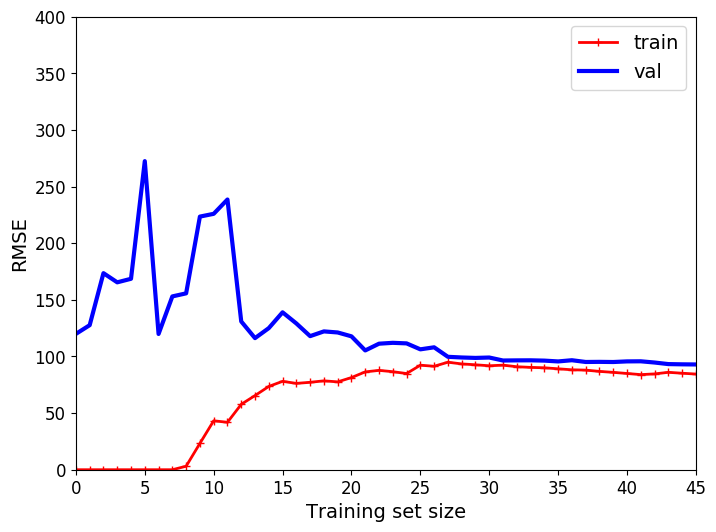

In [309]:
plot_learning_curves(regressor_poly2, X, y)
plt.axis([0, 45, 0, 400])             
plt.show()  

**these learning curve look like the previous one, but there are one very important difference:
the error on the validation data is much lower than with the linear regression model.**

**Linear regression: Lasso regression**

In [310]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

**lasso regression model based on 5-fold cross validation to determine the optimal penalty hyperparameter; using the optimal penalty hyperparameter, respectively evaluate the prediction accuracy of lasso regression in training set and test set.**

In [311]:
lasso=Lasso()
parameters={'alpha':np.arange(1,10,1)}
lasso_cv=GridSearchCV(lasso,param_grid=parameters,cv=5)
lasso_cv.fit(X,y)  
print(lasso_cv.best_params_)   
print(lasso_cv.best_score_) 


{'alpha': 1}
0.232030526453892


**determine the optimal penalty hyperparameter**

In [312]:
lasso=Lasso()
parameters={'alpha':np.arange(0.01,0.1,0.01)}
lasso_cv=GridSearchCV(lasso,param_grid=parameters,cv=5)
lasso_cv.fit(X,y)  
print(lasso_cv.best_params_)    
print(lasso_cv.best_score_) 


{'alpha': 0.09}
0.23210893167994637


**using the optimal penalty hyperparameter to train the model**

In [313]:
lasso=Lasso(alpha=0.02)
lasso_model=lasso.fit(X_train_sc,y_train)
lasso.score(X_train_sc,y_train)

0.2500905818009903

In [314]:
lasso.score(X_test_sc,y_test) 

0.2468326150650282

**Based on lasso regression, evaluate the importance of model variables**

In [315]:
lasso.coef_
imporant=pd.DataFrame({'variable':X.columns,'coef':lasso.coef_}).sort_values(by='coef',ascending=False)
imporant['coef2']=imporant['coef']**2
imporant=imporant.sort_values(by='coef2',ascending=False)
imporant

,variable,coef,coef2
2,TEMP,-76.211496,5808.192063
1,DEWP,60.914908,3710.626075
3,PRES,-16.163463,261.257550
5,Iws,-10.999931,120.998482
4,cbwd,10.585461,112.051994
0,hour,9.881478,97.643599
7,Ir,-9.219793,85.004583
6,Is,-2.113741,4.467902


**Evaluate the performance of lasso regression model using k-fold cross validation:We can then evaluate the model with normalization of the input and output variables using 10-fold cross-validation.**

In [316]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(lasso_model, X_train_sc, y_train, scoring='neg_mean_squared_error', cv=cv)
scores

array([-5758.38227156, -6041.99327665, -6192.4215042 , -6678.40678638,
       -6359.63660038, -6218.37992394, -6074.65962245, -6031.82575543,
       -5931.24213906, -5775.32345243])

In [317]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[5758.38227156 6041.99327665 6192.4215042  6678.40678638 6359.63660038
 6218.37992394 6074.65962245 6031.82575543 5931.24213906 5775.32345243]


In [318]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
# calculate the average RMSE
print(rmse_scores.mean())

[75.88400537 77.73025972 78.69194053 81.72151973 79.74732974 78.856705
 77.94010279 77.66482959 77.01455797 75.9955489 ]
78.1246799338805


**result the rmse mean value is 78.12, that is similar to the plaint linear regression, larger than the polynomial regression.**

**Plot the learning curves of the plain lasso regression model**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.318518273645576, tolerance: 0.8978
  positive)


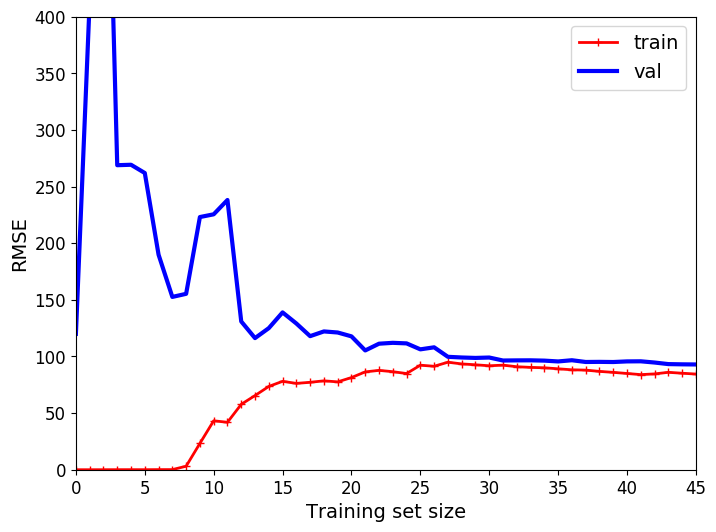

In [319]:
plot_learning_curves(lasso_model, X, y)
plt.axis([0, 45, 0, 400])             
plt.show() 

**the training curve look like the previous one, but there are one very important difference:
the error on the validation data is much higher than with the polynomial regression model.** 

**linear regression: Stochastic Gradient Descent**


**To perform Linear regression using SGD with Scikit-Learn, you can use the SGDRegressor class, which defauls to optimizing the squared error cost function.**

In [0]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_model=sgd_reg.fit(X_train_sc, y_train.ravel())

**the code runs 50 epochs, starting with a learning rate of 0.1(eta0=0.1), using the default learning schedule, abd it does not use any regularization.**

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([96.07457355]),
 array([ 15.42242844,  62.54173485, -73.4545383 , -13.99758193,
         17.6256784 , -11.31123208,  -6.9521127 ,  -9.80562815]))

In [19]:
sgd_reg.score(X_train_sc,y_train)

0.23398839024403106

In [20]:
sgd_reg.score(X_test_sc,y_test)

0.2240757256559427

**Evaluate the performance of  Stochastic Gradient Descent model using k-fold cross validation:We can then evaluate the model with normalization of the input and output variables using 10-fold cross-validation.**

In [21]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(sgd_model, X_train_sc, y_train, scoring='neg_mean_squared_error', cv=cv)
scores

array([-5798.74266143, -6072.45084342, -6269.30680268, -6730.80642084,
       -6565.36261085, -6290.41914758, -6187.03033702, -6140.50630378,
       -5990.47885763, -5929.08649333])

In [22]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[5798.74266143 6072.45084342 6269.30680268 6730.80642084 6565.36261085
 6290.41914758 6187.03033702 6140.50630378 5990.47885763 5929.08649333]


In [23]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
# calculate the average RMSE
print(rmse_scores.mean())

[76.14947578 77.92593178 79.17895429 82.04149207 81.02692522 79.31216267
 78.65767818 78.36138273 77.39818381 77.00056164]
78.70527481807902


**the RMSE mean value is 78.7, is similar to the plaint linear regression and lasso regression, larger than the polynomial regression.**

the learning curve is taking forever, cannot get it.

In [0]:
plot_learning_curves(sgd_reg, X, y)
plt.axis([0, 45, 0, 400])             
plt.show() 

# Fully discuss which model performs the best and why:
**In this case, we used plaint linear regression(score:0.25009169294467504 RMSE:78.12465286510078), lasso regression(score:0.2500905818009903 RMSE:78.1246799338805), Stochastic Gradient Descent regression(score:0.23398839024403106 RMSE:78.70527481807902), and polynomial regression(score:0.31,RMSE:74.82).
we know that we use RMSE to evaluate the performance of the model. We can get polynomial permorming best by comparising these four model. We also can see the Beijing PM2.5 dataset performing curve not a linear line, but my polynomial model is not good because the RMSE is very high.**